In [5]:
import pandas as pd
ln = pd.read_csv("loan.csv", encoding = "utf8")
ln.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Assumptions :
     1. Most of the analysis are done with Target column "loan_status" 
     2. Analysis is done on the borrower which has loan status - Charged Off(Deafult) and Fully paid.
        Excluded current loan Status.
     3. Dropping all the customer behavioural variable as these variable are generated after loan approval.
     4. some outlier is present in data with Annual income 1250000 hence needed to remove
    

In [6]:
#Dropping all the columns which has single variable and which are irrelavent 
ln =ln.drop(ln.loc[:, 'collections_12_mths_ex_med':].columns, axis = 1)

In [7]:
# check the missing value
round(100*(ln.isnull().sum()/len(ln.index)), 2)    

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
pymnt_plan                  0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc  

In [8]:
# following columns have more than 50 % of missing data hence dropping
ln = ln.drop(['mths_since_last_record','mths_since_last_delinq','next_pymnt_d'], axis=1)

# # some have single variable hence neede to be dropped
ln = ln.drop(['initial_list_status','pymnt_plan'], axis=1)

# Dropping all the customer behavioural variable as these variable are generated after loan approval
ln = ln.drop(['delinq_2yrs','revol_bal','revol_util','desc','out_prncp','out_prncp_inv',
              'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
              'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt','out_prncp','out_prncp_inv','pub_rec'], axis=1)


In [9]:
# Check correlation between all the numeric data
corr = ln.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,total_acc
id,1,0.99,0.14,0.15,0.25,0.087,0.0087,0.096,-0.042,0.02,0.042
member_id,0.99,1,0.14,0.15,0.26,0.081,0.0094,0.097,-0.047,0.018,0.044
loan_amnt,0.14,0.14,1,0.98,0.94,0.93,0.27,0.066,0.0092,0.18,0.26
funded_amnt,0.15,0.15,0.98,1,0.96,0.96,0.27,0.066,0.0093,0.18,0.25
funded_amnt_inv,0.25,0.26,0.94,0.96,1,0.91,0.25,0.075,-0.0057,0.16,0.24
installment,0.087,0.081,0.93,0.96,0.91,1,0.27,0.054,0.0097,0.17,0.23
annual_inc,0.0087,0.0094,0.27,0.27,0.25,0.27,1,-0.12,0.034,0.16,0.24
dti,0.096,0.097,0.066,0.066,0.075,0.054,-0.12,1,0.0014,0.29,0.23
inq_last_6mths,-0.042,-0.047,0.0092,0.0093,-0.0057,0.0097,0.034,0.0014,1,0.092,0.11
open_acc,0.02,0.018,0.18,0.18,0.16,0.17,0.16,0.29,0.092,1,0.69


In [11]:
 # As mentioned in the assumption dropping we are excluding analysis for the loan_status = current 

ln = ln[ln["loan_status"] != "Current"]


 ## with loan_amnt, funded_amnt, funded_amnt_inv

In [12]:
ln_amnt = ln.pivot_table(values = 'loan_amnt', index = 'loan_status', aggfunc = 'mean')
ln_amnt

,loan_amnt
loan_status,
Charged Off,12104.385108
Fully Paid,10866.455994


In [13]:
fund_amnt = ln.pivot_table(values = 'funded_amnt', index = 'loan_status', aggfunc = 'mean')
fund_amnt

,funded_amnt
loan_status,
Charged Off,11753.398792
Fully Paid,10618.520486


In [14]:
fund_amnt_inv = ln.pivot_table(values = 'funded_amnt_inv', index = 'loan_status', aggfunc = 'mean')
fund_amnt_inv

,funded_amnt_inv
loan_status,
Charged Off,10864.521324
Fully Paid,10112.837414


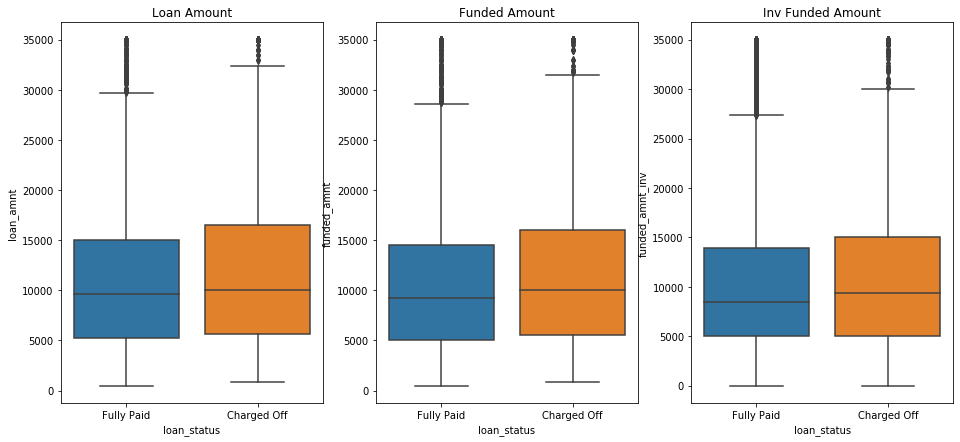

In [20]:
# Box plot of different fund type with with loan status

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# adjust figure size
plt.figure(figsize=(16, 7))

# subplot 1: loan amount
plt.subplot(1, 3, 1)
sns.boxplot(x='loan_status', y='loan_amnt', data=ln)
plt.title("Loan Amount")
# plt.yscale('log')

# subplot 2: funded amount
plt.subplot(1, 3, 2)
sns.boxplot(x='loan_status', y='funded_amnt', data=ln)
plt.title("Funded Amount")
# plt.yscale('log')

# subplot 2: invsetor funded amount
plt.subplot(1, 3, 3)
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=ln)
plt.title("Inv Funded Amount")
# plt.yscale('log')


plt.show()

Points (From pivot table and graph):
1. Correlation between loan_amnt -> Funded Amount =.98 and loan_amnt -> funded_amnt_inv =.94 and Funded Amount -> funded_amnt_inv =.96
 thats means this is heavily correlated where the case is Investor has almost funded the loan amount.
2. The Average funding for defaulter customer is higher than fully paid customer in all the fund category (loan_amnt, Funded Amoun and funded_amnt_inv )

# With Term 

### Univariant analysis of terms

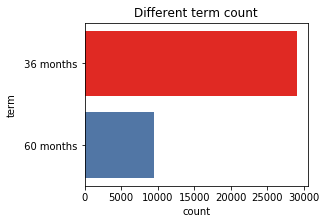

In [32]:
# Univariant analysis of terms with plot
plt.figure(figsize=(4, 3))
sns.countplot(y="term", data=ln)
plt.title("Different term count")
plt.show()


In [35]:
# Average mean amount und invested in terms
ln.pivot_table(values = 'funded_amnt_inv', columns = 'term', index = 'loan_status', aggfunc = 'mean')

term,36 months,60 months
loan_status,,
Charged Off,8074.461124,14615.989769
Fully Paid,8939.745607,14398.490848


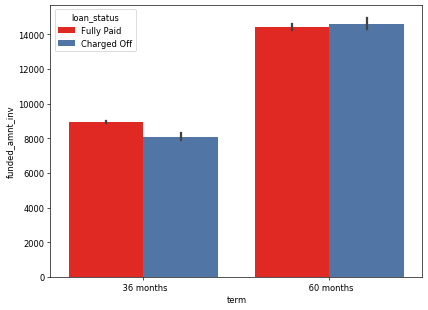

In [22]:
# with plot mean distribution
plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='term', y='funded_amnt_inv', hue="loan_status", data=ln)
plt.show()

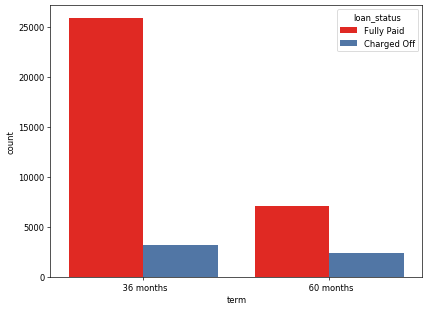

In [23]:
# with plot number borrower in all the terms
plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
sns.countplot(x="term", hue="loan_status", data=ln)
plt.show()

In [24]:
# To find the maximum percentage of defaulter in term
ln.groupby(['term','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = True).head()

loan_status,Charged Off,Fully Paid
term,,
36 months,11.090872,88.909128
60 months,25.313785,74.686215


Points :
        1. The defaulter percentage is more than twice in 60 months term than 30 months term. i.e 25.31%
        

### plot in percentage of defaulter and fully paid with terms
### Bivariant analysis

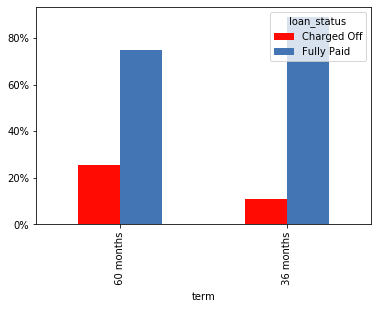

In [26]:
# # plot in percentage defaulter and fully paid
# Bivariant analysis
import matplotlib.ticker as mtick

ln.groupby(['term','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# with Interest Rate

### Univariant Analysis - Interest Rate

In [49]:
ln['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

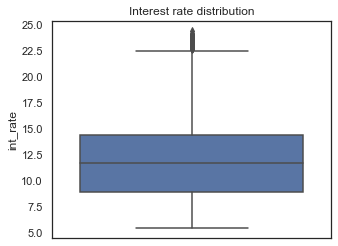

In [41]:
# box plot of interest
plt.figure(figsize=(5,4))
sns.boxplot(y=ln['int_rate'])
plt.title('Interest rate distribution')
plt.show()


### Biivariant Analysis - Interest Rate with loan Status

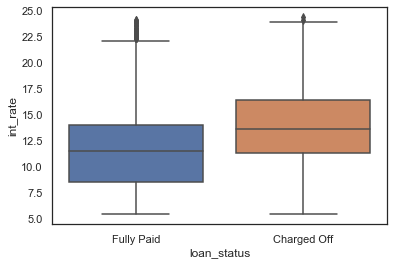

In [33]:

sns.set(style="white")
ln["int_rate"] = ln["int_rate"].str.replace("%", "").astype("float64")
sns.boxplot(x='loan_status', y='int_rate', data=ln)
plt.show()

In [42]:
print("rate of interest in different quartile for defaulted customer")
print((ln.loc[(ln["loan_status"] == "Charged Off"), :])["int_rate"].quantile([.75,.50,.25]))
print("rate of interest in different quartile for  customer")
print((ln.loc[(ln["loan_status"] == "Fully Paid"), :])["int_rate"].quantile([.75,.50,.25]))

rate of interest in different quartile for defaulted customer
0.75    16.40
0.50    13.61
0.25    11.31
Name: int_rate, dtype: float64
rate of interest in different quartile for  customer
0.75    13.99
0.50    11.49
0.25     8.49
Name: int_rate, dtype: float64


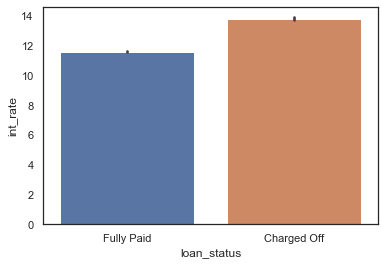

In [43]:
sns.barplot(x='loan_status', y='int_rate', data=ln)
plt.show()

Points :
     from the trends we can observe people wth high interest rate tends to defaulter, Also we can say the median of fully paid customer is equal to lower quartile of customer who does not paid.

## Installment

### Univariant Analysis - Installment

In [48]:
ln["installment"].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

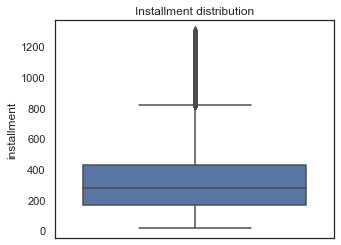

In [46]:
# box plot of Installment
plt.figure(figsize=(5,4))
sns.boxplot(y=ln['installment'])
plt.title('Installment distribution')
plt.show()

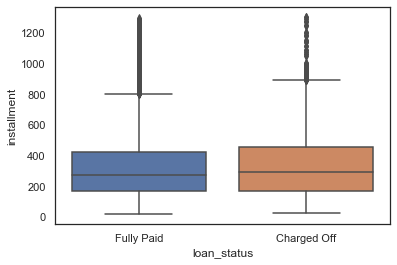

In [44]:
sns.set(style="white")
sns.boxplot(x='loan_status', y='installment', data=ln)
plt.show()

In [50]:
# quantile check
print((ln.loc[(ln["loan_status"] == "Charged Off"), :])["installment"].quantile([.75,.50,.25]))
print((ln.loc[(ln["loan_status"] == "Fully Paid"), :])["installment"].quantile([.75,.50,.25]))

0.75    457.840
0.50    293.870
0.25    168.555
Name: installment, dtype: float64
0.75    420.7350
0.50    275.6500
0.25    165.2825
Name: installment, dtype: float64


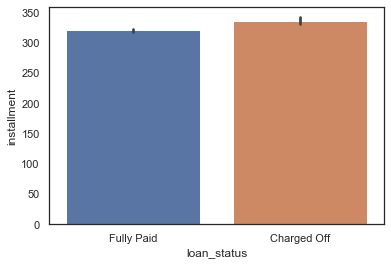

In [231]:
sns.barplot(x='loan_status', y='installment', data=ln)
plt.show()

In [232]:
ln.pivot_table(values = 'installment', index = 'loan_status', aggfunc = 'mean')

,installment
loan_status,
Charged Off,336.175006
Fully Paid,320.125232


Points :
    Average installment for defaulted customer is more than fully paid

## Grade and Subgrade

### Univariant Analysis - Grade

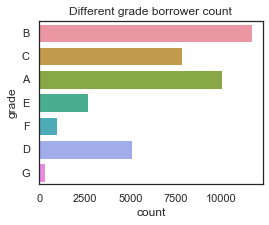

In [54]:
#counnter plot of grade
plt.figure(figsize=(4, 3))
sns.countplot(y="grade", data=ln)
plt.title("Different grade borrower count")
plt.show()

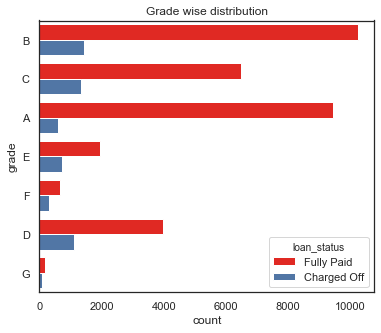

In [52]:
# Number of borrower in differnt grade
plt.figure(figsize=(6, 5))
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(y="grade", hue="loan_status", data=ln)
plt.title("Grade wise distribution")
plt.show()

In [57]:
### Bivariant analysis- Grade

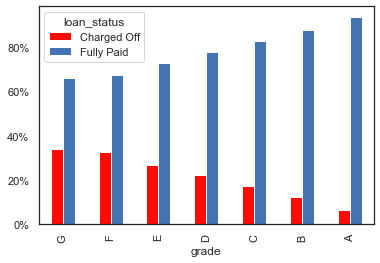

In [56]:
#Check the highest borrower in different Grade
ln.groupby(['grade','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).plot(kind='bar')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [59]:
ln.groupby(['grade','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False)

loan_status,Charged Off,Fully Paid
grade,,
G,33.779264,66.220736
F,32.684426,67.315574
E,26.849418,73.150582
D,21.986234,78.013766
C,17.194281,82.805719
B,12.205567,87.794433
A,5.993031,94.006969


Point :
Grade G has the highest percentage defaulter rate of borrower with 33.77%

## SubGrade

### Univariant Analysis - Subgrade

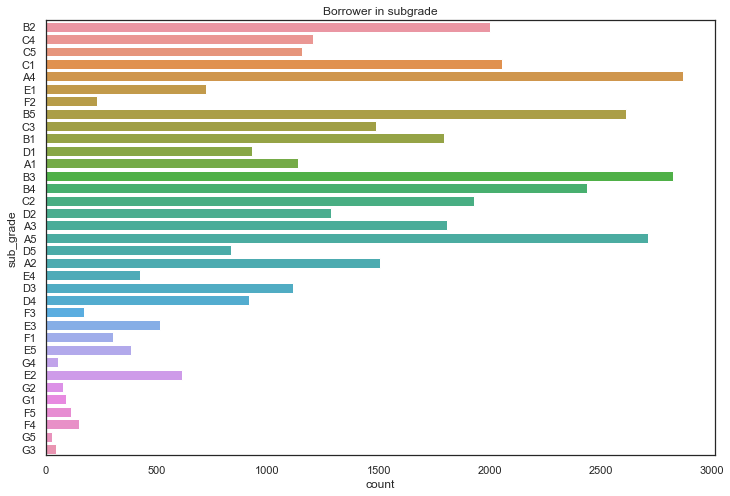

In [62]:
plt.figure(figsize=(12, 8))
sns.countplot(y="sub_grade", data=ln)
plt.title("Borrower in subgrade")
plt.show()

A4 grade has highest number of borrower

## Bivariant analysis: SubGrade

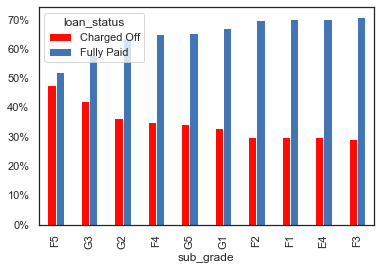

In [65]:
# lets plot with percentage 
ln.groupby(['sub_grade','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head(10).plot(kind='bar')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [67]:
# Percentage of defaulter in subgrade
ln.groupby(['sub_grade','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()

loan_status,Charged Off,Fully Paid
sub_grade,,
F5,47.787611,52.212389
G3,42.222222,57.777778
G2,36.363636,63.636364
F4,35.099338,64.900662
G5,34.482759,65.517241


Points :
    F5 subgrade has the highest number defaulter borrower

## Employment Length 
emp_length

### Univariant Analysis - Employment Length 

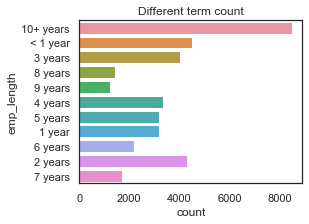

In [69]:
#counter plot
plt.figure(figsize=(4, 3))
sns.countplot(y="emp_length", data=ln)
plt.title("Different term count")
plt.show()

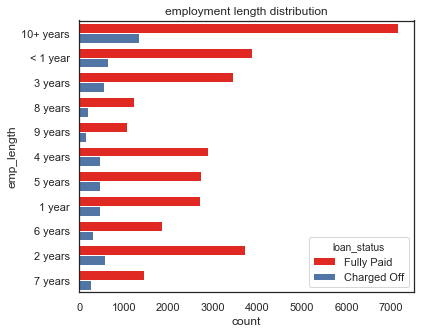

In [70]:
#Counter plot bivariant with loan status
plt.figure(figsize=(6, 5))
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(y="emp_length", hue="loan_status", data=ln)
plt.title("employment length distribution")
plt.show()

which category of employment has maximum defaulter

In [71]:
ln.groupby(['emp_length','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()

loan_status,Charged Off,Fully Paid
emp_length,,
10+ years,15.680961,84.319039
7 years,15.371128,84.628872
1 year,14.389397,85.610603
5 years,14.339386,85.660614
< 1 year,14.174800,85.825200


### Bivariant analysis - Employment Lenght

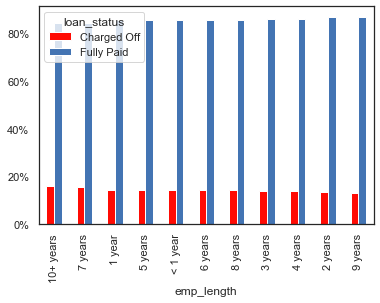

In [72]:
import matplotlib.ticker as mtick
ln.groupby(['emp_length','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

from the highest percenatge 15.68 % defaulter is in in 10+ years

## home_ownership

### Univariant Analysis - Home Ownership

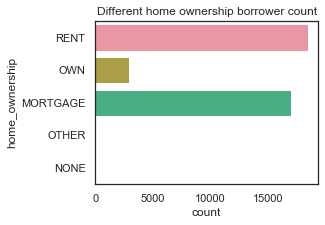

In [74]:
# counter plot
plt.figure(figsize=(4, 3))
sns.countplot(y="home_ownership", data=ln)
plt.title("Different home ownership borrower count")
plt.show()

Points : 
    Rent ownership has the maximum borrower 

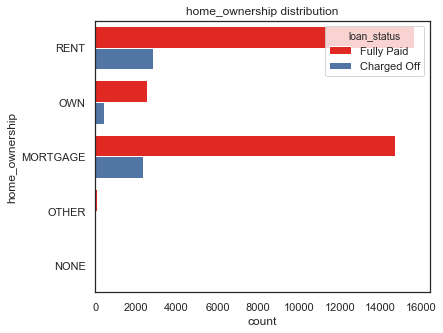

In [75]:
plt.figure(figsize=(6, 5))
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(y="home_ownership", hue="loan_status", data=ln)
plt.title("home_ownership distribution")
plt.show()

In [81]:
#Percentage of defaulter different home ownership
ln.groupby(['home_ownership','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()

loan_status,Charged Off,Fully Paid
home_ownership,,
OTHER,18.367347,81.632653
RENT,15.362554,84.637446
OWN,14.890756,85.109244
MORTGAGE,13.671347,86.328653
NONE,NaN,100.000000


### Bivariant analysis: home_ownership

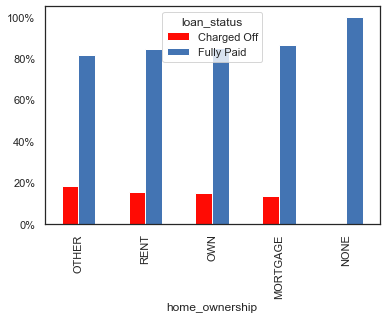

In [80]:

ln.groupby(['home_ownership','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Maximum defaulter is Others group with percentage 18.4 %, 2nd highest is rent 15.4 %

## Annual Income
annual_inc

### Univariant Analysis - Installment

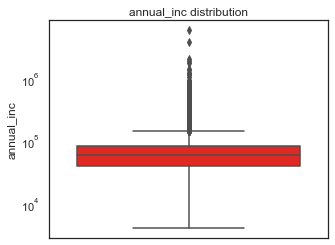

In [83]:
# box plot of Annual Income
plt.figure(figsize=(5,4))
sns.boxplot(y=ln['annual_inc'])
plt.title('annual_inc distribution')
plt.yscale('log')
plt.show()

In [84]:
ln.pivot_table(values = 'annual_inc', index = 'loan_status', aggfunc = 'mean')

,annual_inc
loan_status,
Charged Off,62427.298034
Fully Paid,69862.503328


In [85]:
ln.pivot_table(values = 'annual_inc', index = 'loan_status', aggfunc = 'max')

,annual_inc
loan_status,
Charged Off,1250000.0
Fully Paid,6000000.0


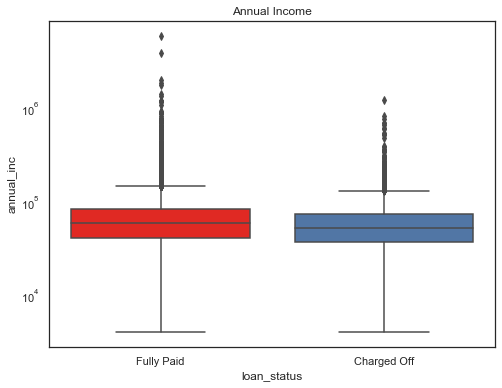

In [86]:
plt.figure(figsize=(8, 6))

# subplot 1: loan amount

sns.boxplot(x='loan_status', y='annual_inc', data=ln)
plt.title("Annual Income")
plt.yscale('log')
plt.show()

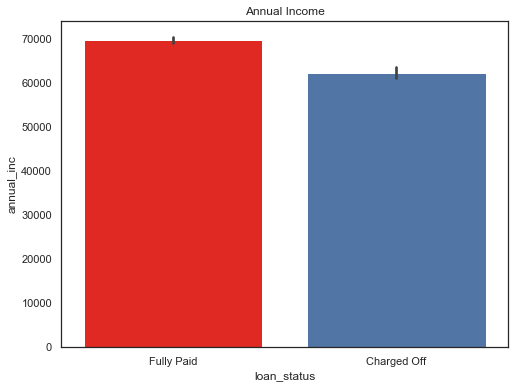

In [87]:
plt.figure(figsize=(8, 6))

# subplot 1: loan amount

sns.barplot(x='loan_status', y='annual_inc', data=ln)
plt.title("Annual Income")
# plt.yscale('log')
plt.show()

In [90]:
(ln.loc[(ln["loan_status"] == "Charged Off"), :])["annual_inc"].quantile([1,.95,.75,.50,.25])

1.00    1250000.0
0.95     129697.2
0.75      75000.0
0.50      53000.0
0.25      37000.0
Name: annual_inc, dtype: float64

In [89]:
(ln.loc[(ln["loan_status"] == "Fully Paid"), :])["annual_inc"].quantile([1,.95,.75,.50,.25])

1.00    6000000.00
0.95     144000.00
0.75      84000.00
0.50      60000.00
0.25      41132.75
Name: annual_inc, dtype: float64

From above there is clear presence of outlier i.e for defaulter its 1250000 and fully paid its 6000000

## Removing outlier for annual income

In [91]:
low, high = ln.annual_inc.quantile([0.0,0.95])
ln = ln.query('{low}<annual_inc<{high}'.format(low=low,high=high))
# popl

In [92]:
ln.pivot_table(values = 'annual_inc', index = 'loan_status', aggfunc = 'mean')

,annual_inc
loan_status,
Charged Off,56410.900685
Fully Paid,61598.117976


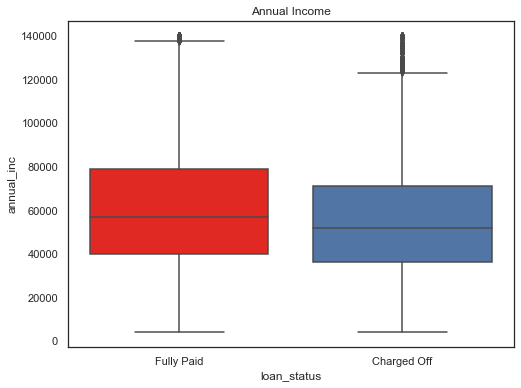

In [93]:
plt.figure(figsize=(8, 6))

# subplot 1: loan amount

sns.boxplot(x='loan_status', y='annual_inc', data=ln)
plt.title("Annual Income")
# plt.yscale('log')
plt.show()

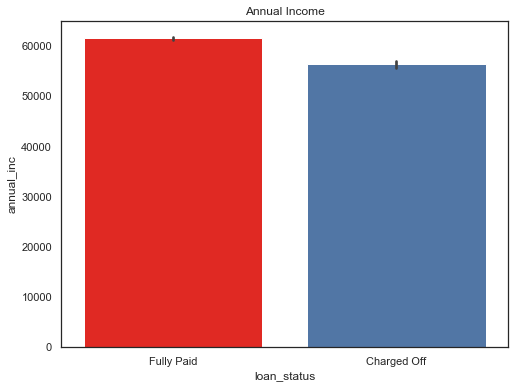

In [95]:
plt.figure(figsize=(8, 6))

# subplot 1: loan amount

sns.barplot(x='loan_status', y='annual_inc', data=ln)
plt.title("Annual Income")
# plt.yscale('log')
plt.show()

Hence we can canculude the average annual income for defaulted customer is less than full paid customer i.e 56410 

## verfication status

### Univariant Analysis - verfication status

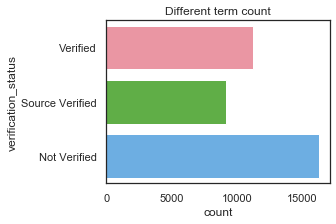

In [97]:
# Univeriant plot
plt.figure(figsize=(4, 3))
sns.countplot(y="verification_status", data=ln)
plt.title("Different term count")
plt.show()

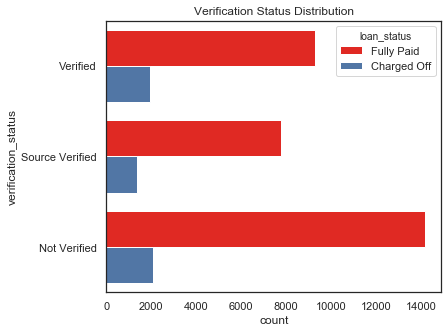

In [295]:
plt.figure(figsize=(6, 5))
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(y="verification_status", hue="loan_status", data=ln)
plt.title("Verification Status Distribution")
plt.show()

In [99]:
ln.groupby(['verification_status','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()

loan_status,Charged Off,Fully Paid
verification_status,,
Verified,17.371143,82.628857
Source Verified,15.005464,84.994536
Not Verified,12.870922,87.129078


Hence highest rate of defaulter is in Verified i.e 17.37.
Let plot the diagram

### Bivariant analysis: Verification Status

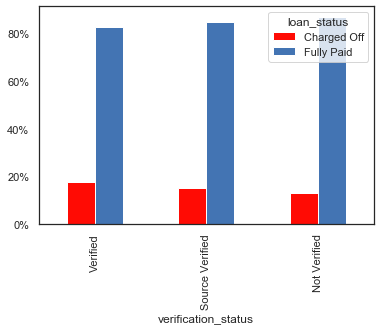

In [100]:
ln.groupby(['verification_status','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Points :
     Maximum defaulter rate is in "Verified" Verification status with percentage 17.37 %, 2nd highest is Source Verified 15.0 %

## purpose

### Univariant Analysis - purpose

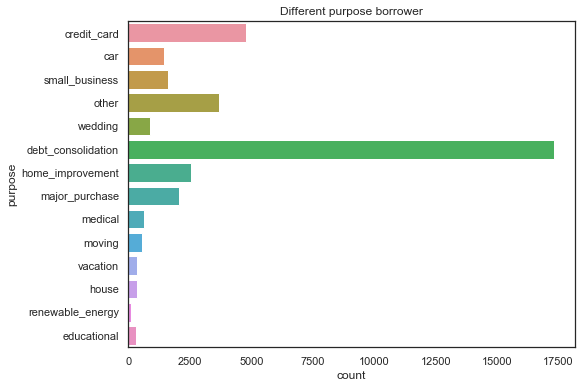

In [103]:
plt.figure(figsize=(8, 6))
sns.countplot(y="purpose", data=ln)
plt.title("Different purpose borrower")
plt.show()

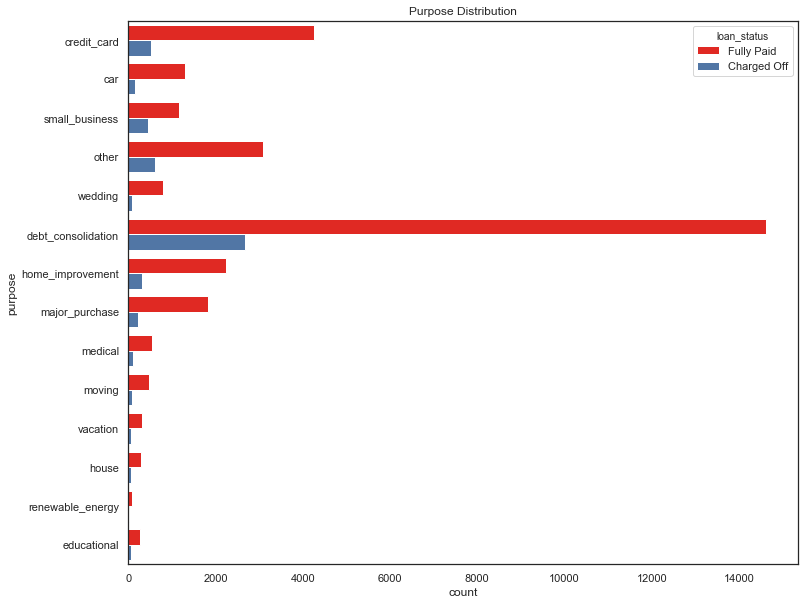

In [354]:
plt.figure(figsize=(12, 10))
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(y="purpose", hue="loan_status", data=ln)
plt.title("Purpose Distribution")
plt.show()

In [105]:
# To find the maximum percentage defaulter in purpose
ln.groupby(['purpose','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()

loan_status,Charged Off,Fully Paid
purpose,,
small_business,27.972890,72.027110
renewable_energy,18.947368,81.052632
educational,17.363344,82.636656
other,16.369048,83.630952
moving,16.363636,83.636364


From the we can canclude the Small business has maximum defaulted customer which is 27.97 %

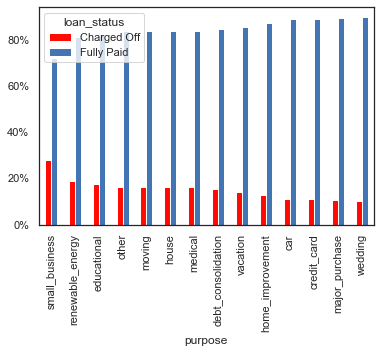

In [107]:
# let up plot the percentage distribution of defaulter and fully paid across all the purpose

ln.groupby(['purpose','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).plot(kind='bar')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## Zipcode

In [108]:
ln["zip_code"] = ln["zip_code"].str.replace("xx", "")

### Bivariant analysis:

In [109]:
# ln.groupby(['zip_code','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack()
ln.groupby(['zip_code','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()

loan_status,Charged Off,Fully Paid
zip_code,,
999,100.0,NaN
094,100.0,NaN
833,100.0,NaN
385,100.0,NaN
689,100.0,NaN


## Address State
addr_state

In [110]:
### Bivariant analysis:

In [111]:
ad_st = ln.groupby(['addr_state','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()
ad_st.head()

loan_status,Charged Off,Fully Paid
addr_state,,
NE,60.000000,40.000000
NV,22.538293,77.461707
ID,20.000000,80.000000
SD,19.354839,80.645161
AK,18.309859,81.690141


## DTI (Debt to income )
dti

In [113]:
ln["dti"].describe()

count    36641.000000
mean        13.447460
std          6.661538
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

### Univariant Analysis - Installment

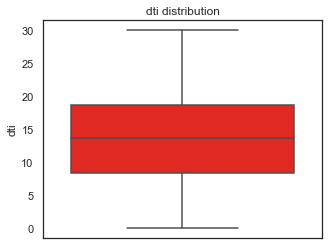

In [114]:
# box plot of Installment
plt.figure(figsize=(5,4))
sns.boxplot(y=ln['dti'])
plt.title('dti distribution')
plt.show()

In [115]:
ln.pivot_table(values = 'dti', index = 'loan_status', aggfunc = 'mean')

,dti
loan_status,
Charged Off,14.107315
Fully Paid,13.333007


In [116]:
ln.pivot_table(values = 'dti', index = 'loan_status', aggfunc = 'max')

,dti
loan_status,
Charged Off,29.85
Fully Paid,29.99


### Bivariant analysis: dti

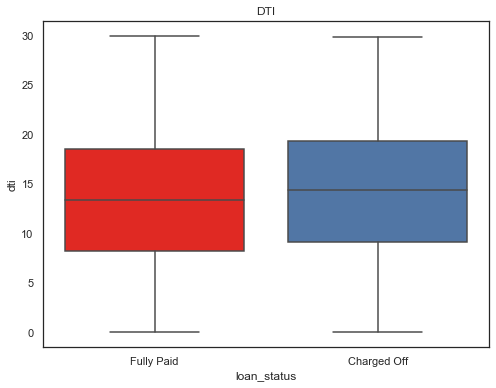

In [117]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='dti', data=ln)
plt.title("DTI")
# plt.yscale('log')
plt.show()

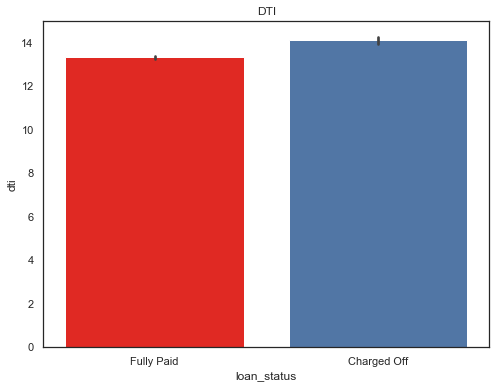

In [118]:
plt.figure(figsize=(8, 6))

# subplot 1: loan amount

sns.barplot(x='loan_status', y='dti', data=ln)
plt.title("DTI")

plt.show()

Point :
    From this we can conclude that custumer which is having high debt value(high dti with low income) will more chance of defaulter.

## earliest crdeit line
earliest_cr_line

In [119]:
ln["earliest_cr_line"].describe()

count      36641
unique       522
top       Oct-99
freq         352
Name: earliest_cr_line, dtype: object

## inquiries in past 6 months
inq_last_6mths

In [120]:
ln["inq_last_6mths"] = ln["inq_last_6mths"].apply(lambda x : str(x))

In [121]:
ln["inq_last_6mths"].describe()


count     36641
unique        9
top           0
freq      17857
Name: inq_last_6mths, dtype: object

### Univariant Analysis

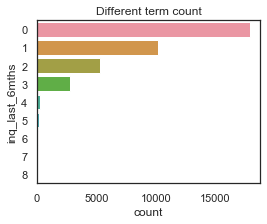

In [122]:
plt.figure(figsize=(4, 3))
sns.countplot(y="inq_last_6mths", data=ln)
plt.title("Different term count")
plt.show()

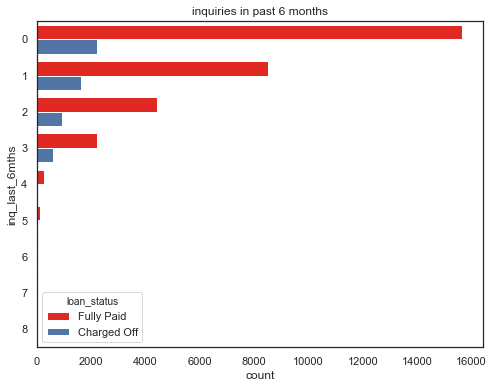

In [370]:
plt.figure(figsize=(8, 6))

sns.countplot(y="inq_last_6mths", hue="loan_status", data=ln)
plt.title("inquiries in past 6 months")
plt.show()

### Bivariant analysis

In [373]:
# To find the maximum percentage defaulter in customer who inquiries in past 6 months
ln.groupby(['inq_last_6mths','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head(3)

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
7,31.250000,68.750000
8,30.000000,70.000000
6,26.785714,73.214286


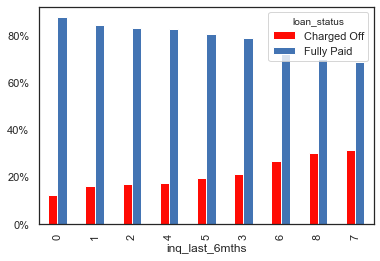

In [380]:
# lets plot with percentage 
ln.groupby(['inq_last_6mths','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = True).plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Points :
Borrower with 7 inquires has maximum chance of default

## Open Account - Number of credit line
open_acc

### Univariant Analysis - Open_acc

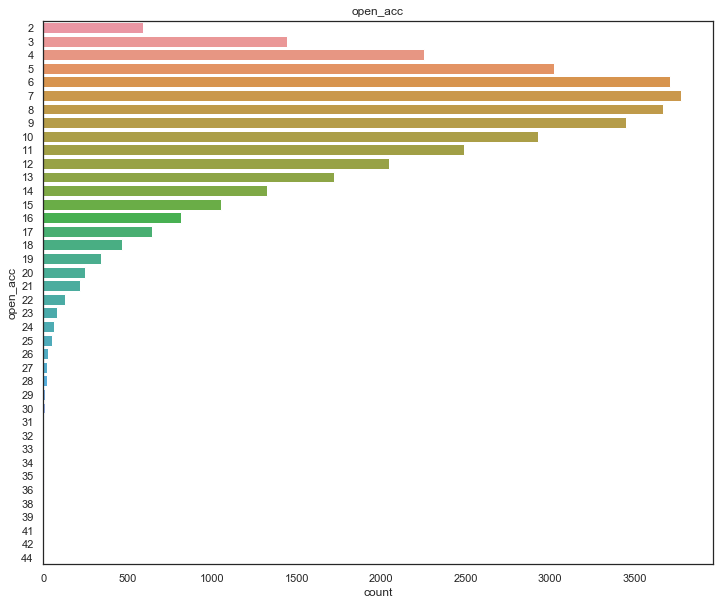

In [123]:
plt.figure(figsize=(12, 10))
sns.countplot(y="open_acc", data=ln)
plt.title("open_acc")
plt.show()

### Bivariant analysis:

In [378]:
# To find the maximum percentage defaulter in purpose
ln.groupby(['open_acc','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head()

loan_status,Charged Off,Fully Paid
open_acc,,
38,100.000000,NaN
33,66.666667,33.333333
31,50.000000,50.000000
28,23.809524,76.190476
27,23.809524,76.190476


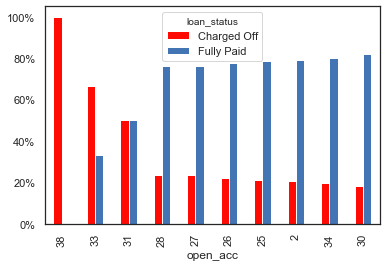

In [384]:
#Plot with percentage 
ln.groupby(['open_acc','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head(10).plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Points :
    more the open account, more the chance of defaulter from the above plot we can verify

 ## Total number of credit lines
total_acc

In [389]:
# To find the maximum percentage defaulter in purpose
ln.groupby(['total_acc','loan_status']).size().groupby(level=0).apply(lambda x : x*100/x.sum()).unstack().sort_values(by = "Charged Off",ascending = False).head(10)

loan_status,Charged Off,Fully Paid
total_acc,,
74,100.000000,NaN
70,100.000000,NaN
60,36.842105,63.157895
2,33.333333,66.666667
66,25.000000,75.000000
3,23.595506,76.404494
43,20.361991,79.638009
45,19.496855,80.503145
4,19.082126,80.917874


Points : 
    
    There is no pattern for total number of credit lines where customer is defaulter